# Train Models

The central goal of machine learning is to train predictive models that can be used by applications. In Azure Machine Learning,  you can use scripts to train models leveraging common machine learning frameworks like Scikit-Learn, Tensorflow, PyTorch, SparkML, and others. You can run these training scripts as experiments in order to track metrics and outputs, which include the trained models.

## Read data from local file



In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('diabetes.csv')

In [8]:
df

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
9995,1469198,6,95,85,37,267,18.497542,0.660240,31,0
9996,1432736,0,55,51,7,50,21.865341,0.086589,34,0
9997,1410962,5,99,59,47,67,30.774018,2.301594,43,1
9998,1958653,0,145,67,30,21,18.811861,0.789572,26,0


In [9]:
df.describe()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,1.000000e+04,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.502122e+06,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,2.892868e+05,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,1.000038e+06,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,1.251672e+06,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,1.504394e+06,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,1.754608e+06,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,1.999997e+06,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


## Fix missing data

In [11]:
len(df)

10000

In [10]:
df_clean = df.dropna()

In [12]:
len(df_clean)

10000

## Normalize data

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler()
num_cols = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree']
df[num_cols] = scaler.fit_transform(df[num_cols])

## Train model

In [16]:
X, y = df[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']].values, df['Diabetic'].values

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
model = DecisionTreeClassifier().fit(X_train, y_train)

In [21]:
import numpy as np

In [22]:
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)

In [23]:
acc

0.892

In [25]:
from sklearn.metrics import roc_auc_score

In [26]:
y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])

In [27]:
auc

0.8773919100452758

In [28]:

from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'ROC Curve')

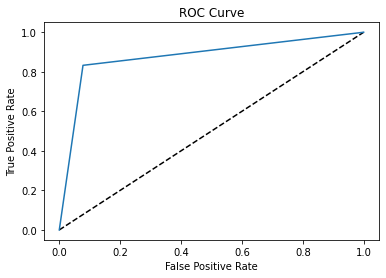

In [29]:
# plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
fig = plt.figure(figsize=(6, 4))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

## Evaluate model

Create test set

In [ ]:
test.drop("Sno", axis=1, inplace=True)
y_test = test['Risk']
X_test = test.drop('Risk', axis=1)

Capture accuracy score

In [ ]:
test_acc = model.score(X_test, y_test)

Capture ML metrics

In [ ]:
from sklearn import metrics

In [ ]:
test_metrics = {
    "Test Accuracy": metrics.accuracy_score(y_test, model.predict(X_test)),
    "Test Recall": metrics.recall_score(y_test, model.predict(X_test), pos_label="good"),
    "Test Precison": metrics.precision_score(y_test, model.predict(X_test), pos_label="good"),
    "Test F1 Score": metrics.f1_score(y_test, model.predict(X_test), pos_label="good")
}

Capture confusion matrix

In [ ]:
test_cm = metrics.plot_confusion_matrix(model, X_test, y_test)